In [ ]:
"""
Objectives:
• Learn to use Cross-validation to pick the best models.
"""

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings

In [35]:
filterwarnings(action='ignore')

Unique Types
 [1 2 3 5 6 7]


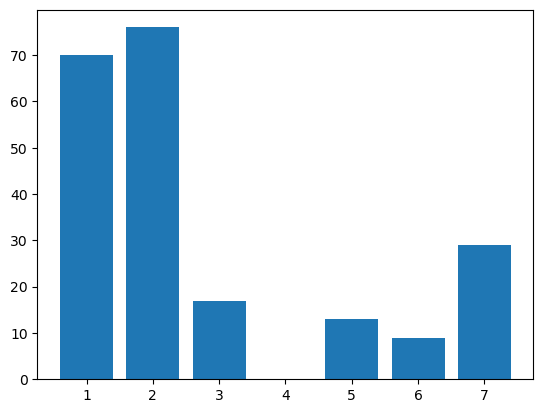

In [36]:
# Load the data from “glass.csv” and make a bar plot of different types of glasses.

CSV_PATH = r'D:\CourseWork\data-science-python-certification-course\Assignments\14 Model Selection and Boosting\Case Study II\resources\glass.csv'
df = pd.read_csv(CSV_PATH)
print("Unique Types\n", df['Type'].unique())
plt.bar(*np.unique(df['Type'], return_counts=True))
plt.show()

In [37]:
X = df.iloc[:, 0:9]
Y = df["Type"]

In [38]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=57, test_size=0.35)

In [39]:
dtm = DecisionTreeClassifier()
dtm.fit(train_x, train_y)
predicted = dtm.predict(test_x)
print("Accuracy Score:", metrics.accuracy_score(test_y, predicted))
print("Root Mean Squared Error:", metrics.mean_squared_error(test_y, predicted))


Accuracy Score: 0.6666666666666666
Root Mean Squared Error: 2.1466666666666665


In [40]:
kf = KFold(n_splits=3)

In [41]:
for train_index, test_index in kf.split(X):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    dtm.fit(x_train, y_train)
    predicted = dtm.predict(x_test)
    print("Accuracy Score :", metrics.accuracy_score(predicted[0:], y_test.values))


print("Cross Value Score:", cross_val_score(dtm, X, Y, cv=3, scoring="accuracy").mean())

Accuracy Score : 0.013888888888888888
Accuracy Score : 0.30985915492957744
Accuracy Score : 0.0
Cross Value Score: 0.5559467918622848


In [44]:
rfc = RandomForestClassifier(
    n_jobs=-1, max_features='sqrt', n_estimators=50, oob_score=True)
parameter_candidates = [{1}, {2}]
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X, Y)
print(CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 100}


In [45]:
rfc = RandomForestClassifier(
    n_jobs=-1, max_features='auto', n_estimators=200, oob_score=True)
print(cross_val_score(rfc, X, Y, cv=10, scoring='accuracy'))

[0.63636364 0.72727273 0.81818182 0.72727273 0.71428571 0.80952381
 0.9047619  0.47619048 0.80952381 0.85714286]
